In [16]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
loader_validation = loader.get_validation_loader()
loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

device = 'cuda:0'
all_graphs_weights_df.shape=(53122, 4921)


((1063, 4921), (53122,))

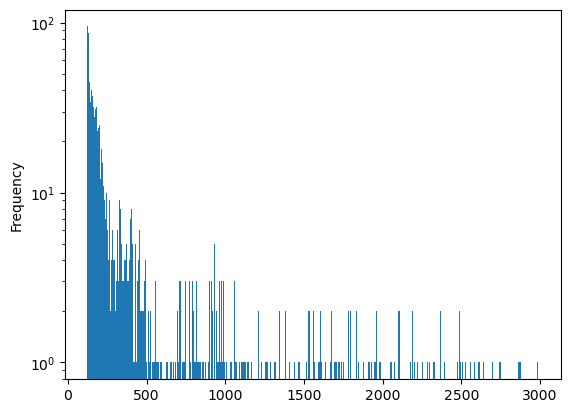

In [18]:
edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 98)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

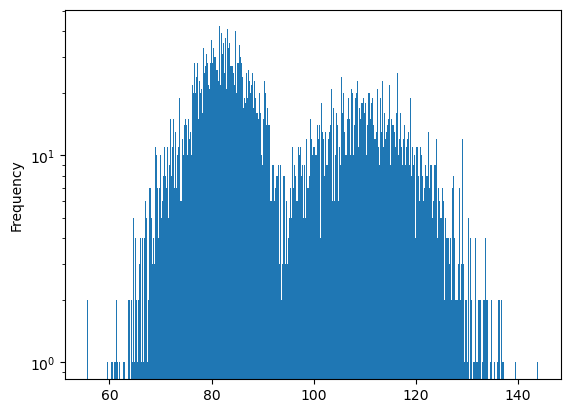

In [5]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [9]:
train_labels = []
for graph in tqdm.tqdm(loader_train.dataset):
    train_labels.append(graph.y.cpu().item())
train_labels.__len__()


filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = ["PKU" if l == 0 else "Control" for l in train_labels] 


filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

100%|██████████| 4921/4921 [00:00<00:00, 771652.83it/s]


,320,365,366,373,718,918,1005,1040,1069,1072,...,52383,52715,52842,52943,52948,52949,52986,53001,53003,Label
0,0.011701,0.011021,0.010808,0.019960,0.009514,0.007080,0.018404,0.016177,0.016984,0.015903,...,0.013708,0.009987,0.015806,0.021940,0.016117,0.015550,0.010563,0.010855,0.012679,Control
1,0.012872,0.054628,0.054082,0.018255,0.042870,0.117237,0.073883,0.045776,0.117051,0.052028,...,0.067726,0.031214,0.033083,0.094317,0.039118,0.019651,0.049885,0.012567,0.013031,PKU
2,0.087173,0.049338,0.048913,0.017631,0.052359,0.086222,0.065941,0.042043,0.023327,0.216047,...,0.044196,0.033998,0.035583,0.143847,0.013696,0.060457,0.042374,0.051378,0.032037,PKU
3,0.012954,0.012427,0.012439,0.016094,0.012234,0.010229,0.015224,0.014134,0.013883,0.013630,...,0.014106,0.010078,0.017012,0.017875,0.013710,0.013688,0.012671,0.012919,0.013342,Control
4,0.011240,0.011254,0.011357,0.020064,0.010008,0.008584,0.017281,0.015127,0.016424,0.016424,...,0.013887,0.010257,0.014343,0.018862,0.016088,0.015551,0.010323,0.011204,0.012836,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.045444,0.054688,0.054338,0.036025,0.034731,0.089858,0.088592,0.050534,0.163572,0.327742,...,0.045810,0.047556,0.034786,0.156304,0.023931,0.037154,0.043350,0.058931,0.031146,PKU
4917,0.013943,0.010582,0.010474,0.014808,0.010085,0.009135,0.018656,0.016436,0.017009,0.016232,...,0.013767,0.010061,0.016244,0.022304,0.016439,0.015787,0.010291,0.013937,0.013903,Control
4918,0.089603,0.055356,0.054987,0.019568,0.062441,0.024439,0.074262,0.038148,0.095555,0.216822,...,0.039880,0.036093,0.043343,0.111351,0.034509,0.063411,0.051222,0.099591,0.080407,PKU
4919,0.098349,0.060817,0.059927,0.072859,0.076275,0.020944,0.076511,0.043604,0.154401,0.397860,...,0.033475,0.181586,0.022455,0.148019,0.015741,0.027692,0.032275,0.104708,0.074791,PKU


In [10]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [11]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

In [31]:
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})

labels =  ["PKU" if l == 0 else "Control" for l in train_labels] 

print(all_graphs_weights_df.shape, labels.__len__())
edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]


(53122, 4921) 4921


In [37]:
edges_node_names_explainer_subgraphs

,node1,node2,0,1,2,3,4,5,6,7,...,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920
320,r2318,hco3_c,0.011701,0.012872,0.087173,0.012954,0.011240,0.013865,0.015445,0.013964,...,0.013860,0.013856,0.101854,0.019667,0.013364,0.045444,0.013943,0.089603,0.098349,0.013940
365,r0074,nad_m,0.011021,0.054628,0.049338,0.012427,0.011254,0.012277,0.013001,0.014812,...,0.014343,0.013054,0.050422,0.010225,0.052749,0.054688,0.010582,0.055356,0.060817,0.014025
366,r0074,nadh_m,0.010808,0.054082,0.048913,0.012439,0.011357,0.012216,0.012923,0.014626,...,0.014701,0.012890,0.049562,0.010080,0.052326,0.054338,0.010474,0.054987,0.059927,0.013970
373,r1638,cys_L_c,0.019960,0.018255,0.017631,0.016094,0.020064,0.017344,0.013884,0.015545,...,0.014950,0.014954,0.019157,0.030865,0.016189,0.036025,0.014808,0.019568,0.072859,0.015452
718,r1493,gthrd_c,0.009514,0.042870,0.052359,0.012234,0.010008,0.012432,0.013931,0.014077,...,0.013459,0.013022,0.105448,0.031542,0.051016,0.034731,0.010085,0.062441,0.076275,0.013611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52948,r1903,phe_L_e,0.016117,0.039118,0.013696,0.013710,0.016088,0.013676,0.013225,0.012893,...,0.012995,0.012995,0.018240,0.022400,0.014713,0.023931,0.016439,0.034509,0.015741,0.012209
52949,r1903,phe_L_c,0.015550,0.019651,0.060457,0.013688,0.015551,0.013702,0.013159,0.012832,...,0.012878,0.012770,0.016517,0.019183,0.109636,0.037154,0.015787,0.063411,0.027692,0.012076
52986,r0885,gthrd_c,0.010563,0.049885,0.042374,0.012671,0.010323,0.012825,0.013819,0.013952,...,0.013375,0.012900,0.071219,0.022926,0.048833,0.043350,0.010291,0.051222,0.032275,0.013693
53001,r2326,hco3_c,0.010855,0.012567,0.051378,0.012919,0.011204,0.013947,0.015622,0.013928,...,0.013952,0.013952,0.132176,0.019657,0.013183,0.058931,0.013937,0.099591,0.104708,0.013927


In [ ]:
import cobra
from cobra.io import load_json_model
import numpy as np
import pandas as pd
cobra_model = load_json_model("./COBRA_models/GEM_Recon2_thermocurated_redHUMAN.json")
import itertools
def grow_dict(previo, nuevo):  
    """Esto es un .update(overwritte=False)?"""

    not_new_keys = set(previo.keys()).intersection(set(nuevo.keys()))
    new_keys     = set(nuevo.keys()).difference(set(previo.keys()))
    for new in new_keys:
        previo[new] =np.unique(nuevo[new]).tolist() 
    for common in not_new_keys:
        previo[common].extend(np.unique(nuevo[common]).tolist() )
    return previo
# Sacamos los genes de Recon hacia un diccionario
# TODO: convertir est en una horrible dict_comprehension { curse : cursed for c in curseds }
dict_rxn_to_gene = dict()
genes            = [g.id for g in cobra_model.genes]

#print(genes)


for id in genes:
    # fmt: off
    rxns             = [r.id for r in cobra_model.genes.get_by_id(id)._reaction] # reacciones asociadas al gen de la iter
    updated_dict  : dict[str, list[str]] = dict(zip(rxns,itertools.repeat([id]))) # zipping con la { reaccion : [id_gen] }
    dict_rxn_to_gene = grow_dict(dict_rxn_to_gene, updated_dict) # merge recursivo
genes = []


for node_1, node_2 in zip(edges_node_names_explainer_subgraphs.node1.tolist(), edges_node_names_explainer_subgraphs.node2.tolist()):   
    
    
    if node_2 in dict_rxn_to_gene.keys():
        
        genes.append(dict_rxn_to_gene[node_2])
        
    elif node_1 in dict_rxn_to_gene.keys():
        
        genes.append(dict_rxn_to_gene[node_1])
        
    else:
        genes.append([''])
     

In [56]:

genes_df = pd.Series(genes, name='genes').reset_index(drop=True, inplace=False)
pd.concat([genes_df, edges_node_names_explainer_subgraphs.reset_index(drop=True, inplace=False)], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,...,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923
0,[6578.1],r2318,hco3_c,0.011701,0.012872,0.087173,0.012954,0.011240,0.013865,0.015445,...,0.013860,0.013856,0.101854,0.019667,0.013364,0.045444,0.013943,0.089603,0.098349,0.013940
1,[8659.1],r0074,nad_m,0.011021,0.054628,0.049338,0.012427,0.011254,0.012277,0.013001,...,0.014343,0.013054,0.050422,0.010225,0.052749,0.054688,0.010582,0.055356,0.060817,0.014025
2,[8659.1],r0074,nadh_m,0.010808,0.054082,0.048913,0.012439,0.011357,0.012216,0.012923,...,0.014701,0.012890,0.049562,0.010080,0.052326,0.054338,0.010474,0.054987,0.059927,0.013970
3,[8140.1],r1638,cys_L_c,0.019960,0.018255,0.017631,0.016094,0.020064,0.017344,0.013884,...,0.014950,0.014954,0.019157,0.030865,0.016189,0.036025,0.014808,0.019568,0.072859,0.015452
4,[],r1493,gthrd_c,0.009514,0.042870,0.052359,0.012234,0.010008,0.012432,0.013931,...,0.013459,0.013022,0.105448,0.031542,0.051016,0.034731,0.010085,0.062441,0.076275,0.013611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,[9057.1],r1903,phe_L_e,0.016117,0.039118,0.013696,0.013710,0.016088,0.013676,0.013225,...,0.012995,0.012995,0.018240,0.022400,0.014713,0.023931,0.016439,0.034509,0.015741,0.012209
1059,[9057.1],r1903,phe_L_c,0.015550,0.019651,0.060457,0.013688,0.015551,0.013702,0.013159,...,0.012878,0.012770,0.016517,0.019183,0.109636,0.037154,0.015787,0.063411,0.027692,0.012076
1060,[1468.1],r0885,gthrd_c,0.010563,0.049885,0.042374,0.012671,0.010323,0.012825,0.013819,...,0.013375,0.012900,0.071219,0.022926,0.048833,0.043350,0.010291,0.051222,0.032275,0.013693
1061,[6578.1],r2326,hco3_c,0.010855,0.012567,0.051378,0.012919,0.011204,0.013947,0.015622,...,0.013952,0.013952,0.132176,0.019657,0.013183,0.058931,0.013937,0.099591,0.104708,0.013927


In [35]:


results_for_R =  pd.concat([pd.Series(genes, name='genes').loc[edge_mask,], edges_node_names_explainer_subgraphs], axis=1).reset_index(drop=True)
results_for_R

,genes,node1,node2,0,1,2,3,4,5,6,...,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920
0,"[6470.1, 6470.2]",r2318,hco3_c,0.011701,0.012872,0.087173,0.012954,0.011240,0.013865,0.015445,...,0.013860,0.013856,0.101854,0.019667,0.013364,0.045444,0.013943,0.089603,0.098349,0.013940
1,[8140.1],r0074,nad_m,0.011021,0.054628,0.049338,0.012427,0.011254,0.012277,0.013001,...,0.014343,0.013054,0.050422,0.010225,0.052749,0.054688,0.010582,0.055356,0.060817,0.014025
2,[9057.1],r0074,nadh_m,0.010808,0.054082,0.048913,0.012439,0.011357,0.012216,0.012923,...,0.014701,0.012890,0.049562,0.010080,0.052326,0.054338,0.010474,0.054987,0.059927,0.013970
3,[9057.1],r1638,cys_L_c,0.019960,0.018255,0.017631,0.016094,0.020064,0.017344,0.013884,...,0.014950,0.014954,0.019157,0.030865,0.016189,0.036025,0.014808,0.019568,0.072859,0.015452
4,[9057.1],r1493,gthrd_c,0.009514,0.042870,0.052359,0.012234,0.010008,0.012432,0.013931,...,0.013459,0.013022,0.105448,0.031542,0.051016,0.034731,0.010085,0.062441,0.076275,0.013611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,NaN,r1903,phe_L_e,0.016117,0.039118,0.013696,0.013710,0.016088,0.013676,0.013225,...,0.012995,0.012995,0.018240,0.022400,0.014713,0.023931,0.016439,0.034509,0.015741,0.012209
1059,NaN,r1903,phe_L_c,0.015550,0.019651,0.060457,0.013688,0.015551,0.013702,0.013159,...,0.012878,0.012770,0.016517,0.019183,0.109636,0.037154,0.015787,0.063411,0.027692,0.012076
1060,NaN,r0885,gthrd_c,0.010563,0.049885,0.042374,0.012671,0.010323,0.012825,0.013819,...,0.013375,0.012900,0.071219,0.022926,0.048833,0.043350,0.010291,0.051222,0.032275,0.013693
1061,NaN,r2326,hco3_c,0.010855,0.012567,0.051378,0.012919,0.011204,0.013947,0.015622,...,0.013952,0.013952,0.132176,0.019657,0.013183,0.058931,0.013937,0.099591,0.104708,0.013927


In [57]:
results_for_R.to_csv("./results/data/results_for_R.csv")

In [59]:
pd.Series(labels).to_csv("./results/data/results_for_R_labels.csv")